In [1]:
import pickle
import numpy as np

train_file = "model_total/data/train_data.pkl"
test_file = "model_total/data/test_data.pkl"

train_mean_file = "model_total/data/train_mean.pkl"
test_mean_file = "model_total/data/test_mean.pkl"

train_std_file = "model_total/data/train_std.pkl"
test_std_file = "model_total/data/test_std.pkl"

train_data = pickle.load(open(train_file, "rb"))
test_data = pickle.load(open(test_file, "rb"))

mean1 = float(pickle.load(open(train_mean_file, "rb")))
mean2 = float(pickle.load(open(test_mean_file, "rb")))

std1 = float(pickle.load(open(train_std_file, "rb")))
std2 = float(pickle.load(open(test_std_file, "rb")))


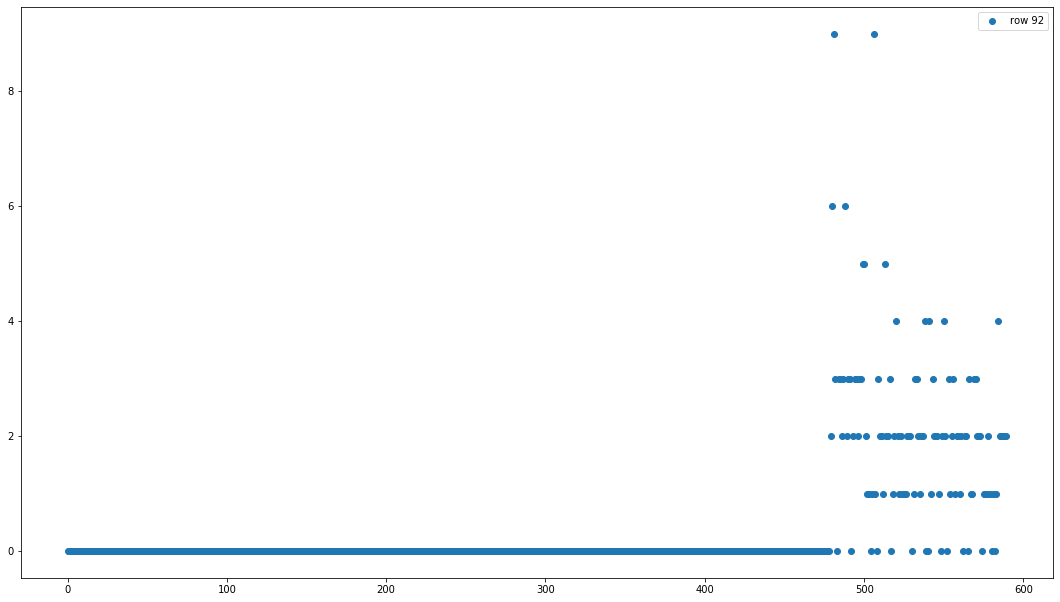

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

td = train_data*std1 + mean1
td = td.numpy()

for i,row in enumerate(td):
    plt.scatter(range(0, train_data.shape[1]), row, label="row " + str(i))
    plt.legend()
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.show()
    input()
    clear_output()

In [2]:













data_norm = data_norm.numpy()

In [3]:
data_norm.shape

(730, 5, 759)

In [5]:
diff = 0
summation = 0
data = data_norm*std + mean

for idx in range(data.shape[2]):
    for store in range(5):
        d = data[:-142, store, idx]
        me = np.median(d)
        for val in d:
            diff += abs(me - val)
            summation += val
            
print(diff, summation, diff / summation)

416450.0005016327 470018.0005016327 0.8860298968489955


In [2]:
import pandas as pd
from pathlib import Path

data_dir = Path('data')

sales_dataframes = []
for year in [2017, 2018]:
    sales_dataframes.append(
        pd.read_csv(
            data_dir / '銷售數量{}.txt'.format(year), sep='\t'
        ).loc[:, ['原始店號', '日期', '商品代號', '銷售數量']]
    )

sales_data = pd.concat(sales_dataframes, axis=0)

print(sales_data)

          原始店號        日期     商品代號  銷售數量
0         1205  20170101  3410025     1
1         1205  20170101  3410025     1
2         1205  20170101  1810792     1
3         1205  20170101  2920637     2
4         1205  20170101  5842614     1
...        ...       ...      ...   ...
1417895  12236  20181231  1720082     1
1417896  12236  20181231  3110180     1
1417897  12236  20181231  6115400     1
1417898  12236  20181231  2710189     1
1417899  12236  20181231  2910367     2

[2814781 rows x 4 columns]


In [9]:
sale_data_agged = sales_data.groupby(['日期', '原始店號', '商品代號'], as_index=True).agg(["sum"])


In [11]:
sale_data_agged
sale_data_agged.index

MultiIndex([(20170101,  1205,  610010),
            (20170101,  1205,  610038),
            (20170101,  1205,  610042),
            (20170101,  1205,  610088),
            (20170101,  1205,  610238),
            (20170101,  1205,  610256),
            (20170101,  1205,  611052),
            (20170101,  1205,  611393),
            (20170101,  1205,  611448),
            (20170101,  1205,  611452),
            ...
            (20181231, 12236, 6138175),
            (20181231, 12236, 6160178),
            (20181231, 12236, 6160423),
            (20181231, 12236, 6160437),
            (20181231, 12236, 6160441),
            (20181231, 12236, 6160946),
            (20181231, 12236, 6160950),
            (20181231, 12236, 6160964),
            (20181231, 12236, 6160978),
            (20181231, 12236, 6160982)],
           names=['日期', '原始店號', '商品代號'], length=1436147)

In [21]:
print(sale_data_agged.loc[20170101,  1205,  610010]['銷售數量', "sum"])

1


In [4]:
import pandas as pd
from pathlib import Path

data_dir = Path('data')
commodity_dataframe = pd.read_csv(data_dir / '商品主檔.txt', sep='\t')


In [27]:
indexed_frame = commodity_dataframe.loc[:, ["商品代號", "原始店號", "品番", "群番"]].set_index(["商品代號", "原始店號"])
indexed_frame.loc[617008, 1205]["品番"]

6

In [5]:
import numpy as np
import torch
a = np.array([1,2,3,4,5,6,7,8,9])
b = torch.tensor(a[:5])
c = torch.tensor(a[3:])

b *= 2
print(b)
print(c)

tensor([ 2,  4,  6,  8, 10], dtype=torch.int32)
tensor([4, 5, 6, 7, 8, 9], dtype=torch.int32)


In [19]:

a = np.array([1,2,3,4,5,6,7,8,9])
b = torch.tensor(a[:5])
c = torch.tensor(a[3:6])
d = torch.tensor(a[4:])

e = torch.cat((b,c,d), 0)
print(e)

tensor([1, 2, 3, 4, 5, 4, 5, 6, 5, 6, 7, 8, 9], dtype=torch.int32)


In [12]:
a, b = divmod(100,3)
print(a, b)

33 1


In [8]:
import numpy as np
def cmp_to_key(mycmp):
    'Convert a cmp= function into a key= function'
    class K:
        def __init__(self, obj, *args):
            self.obj = obj
        def __lt__(self, other):
            return mycmp(self.obj, other.obj) < 0
        def __gt__(self, other):
            return mycmp(self.obj, other.obj) > 0
        def __eq__(self, other):
            return mycmp(self.obj, other.obj) == 0
        def __le__(self, other):
            return mycmp(self.obj, other.obj) <= 0
        def __ge__(self, other):
            return mycmp(self.obj, other.obj) >= 0
        def __ne__(self, other):
            return mycmp(self.obj, other.obj) != 0
    return K

def feature_cmp(x, y):
    for i in range(len(x)):
        if x[i] != y[i]:
            return y[i] - x[i]
    return 0     

a = [np.array([1,0,1,0,1,0]), np.array([1,1,0,0,1,0]), np.array([0,0,0,0,0,0]), np.array([0,1,1,1,0,1])]

b = np.array(sorted(a, key=cmp_to_key(feature_cmp)))

In [9]:
print(b)

[[1 1 0 0 1 0]
 [1 0 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 0 0]]


In [12]:
import pickle
import numpy as np
import torch

feature_file = "model_total/data/feature_data.pkl"
feature = pickle.load(open(feature_file, "rb"))



In [13]:
row = feature[0]

In [20]:
a = torch.cat((feature[0][:5], feature[0][5+759:]), dim=0)
b = torch.cat((feature[1][:5], feature[1][5+759:]), dim=0)
print(a)
print(b)

tensor([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [25]:
torch.zeros(5)

tensor([0., 0., 0., 0., 0.])

In [1]:
import pandas as pd


In [18]:
with open("data/銷售數量" + "2017" + "_transformed.csv", 'r', encoding='utf-8') as f:
    order_df = pd.read_csv(f, sep=',')

In [27]:
shop_df = order_df[order_df["原始店號"] == 1205]
row = shop_df[shop_df["商品代號"] == 610010].values

In [41]:
a = set(shop_df["商品代號"].values)


In [46]:
1540121 in a

True

In [47]:
import numpy as np

In [48]:
a = np.array([1,2,3,4,0,0,0])
b = np.array([1,2,3,0,0])
a+b

ValueError: operands could not be broadcast together with shapes (7,) (5,) 